__Data Diri__
1. Nama: Martin Pardamean Batubara
2. Email: martinpardameanb@gmail.com
3. Asal Daerah: Batam

In [ ]:
#import package
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn import datasets
import os

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
!pip install split_folders
import splitfolders


In [ ]:
#mempersiapkan data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-09 05:08:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.45MB/s    in 49s     

2021-04-09 05:09:42 (6.24 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#ekstraksi zip
import zipfile,os
file_zip = '/tmp/rockpaperscissors.zip'
zip = zipfile.ZipFile(file_zip, 'r')
zip.extractall('/tmp')
zip.close 

<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/rockpaperscissors.zip' mode='r'>>

In [ ]:
#label daftar
os.listdir('/tmp/rockpaperscissors')

['scissors', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images', 'paper']

In [ ]:
#memisahkan direktor
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output = '/tmp/rockpaperscissors', seed = 1337, ratio = (0.6, 0.4))
train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 3256.12 files/s]


In [ ]:
rock_dir = os.path.join (base_dir, 'rock')
paper_dir = os.path.join (base_dir, 'paper')
scissors_dir = os.path.join (base_dir, 'scissors')

In [ ]:
#rock
train_rock_dir, val_rock_dir = train_test_split (os.listdir (rock_dir), test_size = 0.4)
#paper
train_paper_dir, val_paper_dir = train_test_split (os.listdir (paper_dir), test_size = 0.4)
#scissors
train_scissors_dir, val_scissors_dir = train_test_split (os.listdir (scissors_dir), test_size = 0.4)

In [ ]:
#data train
train_rock = os.path.join (train_dir, 'rock')
train_paper = os.path.join (train_dir, 'paper')
train_scissors = os.path.join (train_dir, 'scissors')
#data test
val_rock = os.path.join (validation_dir, 'rock')
val_paper = os.path.join (validation_dir, 'paper')
val_scissors = os.path.join (validation_dir, 'scissors')

In [ ]:

class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('accuracy') > 0.97):
                print("\nReached 96% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

Epoch 1/20
25/25 - 42s - loss: 0.1111 - accuracy: 0.9675 - val_loss: 0.1779 - val_accuracy: 0.9812
Epoch 2/20
25/25 - 41s - loss: 0.0611 - accuracy: 0.9762 - val_loss: 0.0501 - val_accuracy: 0.9812

Reached 96% accuracy so cancelling training!
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


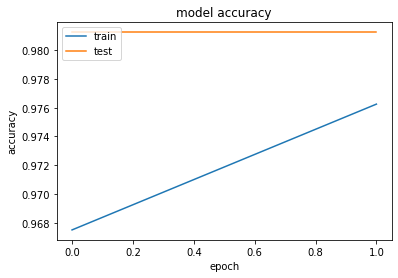

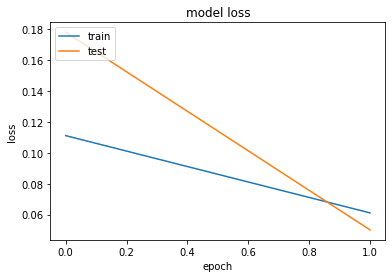

In [ ]:
import matplotlib.pyplot as plt
import numpy
tesmodel = model.fit(
              train_generator,
              steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
              epochs=20,
              validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
              validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
              verbose=2,
              callbacks=[callbacks])
print(tesmodel.history.keys())
# summarize history for accuracy
plt.plot(tesmodel.history['accuracy'])
plt.plot(tesmodel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(tesmodel.history['loss'])
plt.plot(tesmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 20210409_122607.jpg to 20210409_122607 (1).jpg
20210409_122607.jpg
paper


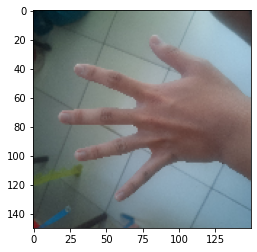

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')